In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
dataset = pd.read_csv("drive/My Drive/fer2013.csv")

In [0]:
dataset.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [0]:
dataset.info()
dataset.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
emotion    35887 non-null int64
pixels     35887 non-null object
Usage      35887 non-null object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


,emotion,pixels,Usage
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest
35886,2,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...,PrivateTest


In [0]:
X_train = []
X_test = []
y_train = []
y_test = []
for i in range(35887):
  image = dataset.iloc[i][1].split(" ")
  image = np.array(image,"float32")
  emotion = dataset.iloc[i][0]
  if(dataset.iloc[i][2]=="Training"):
    X_train.append(image)
    y_train.append(emotion)
  else:
    X_test.append(image)
    y_test.append(emotion)

In [0]:
X_train = np.array(X_train,'float32')

In [0]:
X_train.shape

(28709, 2304)

In [0]:
X_test = np.array(X_test,'float32')

In [0]:
X_test.shape

(7178, 2304)

In [0]:
X_train = X_train.reshape(X_train.shape[0],48,48)/255
X_test = X_test.reshape(X_test.shape[0],48,48)/255

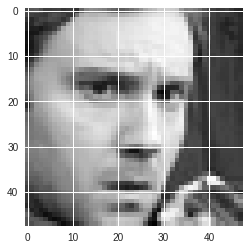

In [0]:
plt.imshow(X_train[0],cmap="gray")

In [0]:
X_train = X_train.reshape(X_train.shape[0],48,48,1)
X_test = X_test.reshape(X_test.shape[0],48,48,1)

In [0]:
y_train = np.array(y_train,"float32")

In [0]:
y_train.shape

(28709,)

In [0]:
y_train[0]

0.0

In [0]:
y_test = np.array(y_test,"float32")
y_test.shape

(7178,)

In [0]:
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,AveragePooling2D
from keras.models import Sequential
from keras.optimizers import RMSprop

In [0]:
def model():
  
  model = Sequential()
  
  model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1),padding="same"))
  model.add(Conv2D(64,(5,5),activation="relu",padding="same"))
  model.add(MaxPooling2D(pool_size=(3,3)))
            
  model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
  model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
  model.add(MaxPooling2D(pool_size=(3,3)))
  
  model.add(Conv2D(128,(3,3),dilation_rate=(2,2),activation="relu",padding="same"))
  model.add(Conv2D(128,(3,3),activation="relu",padding="valid"))
  model.add(MaxPooling2D(pool_size=(3,3)))
  
  model.add(Flatten())
  model.add(Dense(1024,activation="relu"))
  model.add(Dropout(0.2))
  model.add(Dense(1024,activation="relu"))
  model.add(Dropout(0.2))
  model.add(Dense(7,activation="softmax"))
  model.compile(loss="categorical_crossentropy",metrics=['accuracy'],optimizer=RMSprop(lr=0.0002,decay=1e-08))
  
  return model

In [0]:
model = model()

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 48, 48, 64)        1664      
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 48, 48, 64)        102464    
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 5, 5, 128)         73856     
__________

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical

In [0]:
y_train = to_categorical(y_train,7)
y_train[0]

array([1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
generator = ImageDataGenerator()
trainGenerator = generator.flow(X_train,y_train,batch_size=128)

In [0]:
h = model.fit_generator(trainGenerator,steps_per_epoch=128,epochs=50,verbose=1,shuffle=1)

Epoch 1/50
128/128 [==============================] - 11s 88ms/step - loss: 1.8243 - acc: 0.2499
Epoch 2/50
128/128 [==============================] - 10s 81ms/step - loss: 1.7475 - acc: 0.2866
Epoch 3/50
128/128 [==============================] - 10s 81ms/step - loss: 1.6404 - acc: 0.3556
Epoch 4/50
128/128 [==============================] - 10s 82ms/step - loss: 1.5569 - acc: 0.3936
Epoch 5/50
128/128 [==============================] - 10s 82ms/step - loss: 1.5085 - acc: 0.4184
Epoch 6/50
128/128 [==============================] - 10s 81ms/step - loss: 1.4554 - acc: 0.4417
Epoch 7/50
128/128 [==============================] - 10s 82ms/step - loss: 1.4100 - acc: 0.4575
Epoch 8/50
128/128 [==============================] - 10s 82ms/step - loss: 1.3510 - acc: 0.4843
Epoch 9/50
128/128 [==============================] - 10s 82ms/step - loss: 1.3354 - acc: 0.4887
Epoch 10/50
128/128 [==============================] - 10s 82ms/step - loss: 1.2805 - acc: 0.5063
Epoch 11/50
128/128 [========

In [0]:
model.save("fer2013.h5")